In [2]:
#7-1 결측치 정제하기
#실습-결측치 찾기
import pandas as pd
import numpy as np

df = pd.DataFrame({'sex' : ['M','F', np.nan, 'M', 'F'],
                   'score': [5,4,3,4, np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [3]:
df['score'] +1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [4]:
#결측치 확인하기
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [5]:
pd.isna(df).sum() #결측치 빈도 확인

sex      1
score    1
dtype: int64

In [6]:
#실습-결측치 제거하기
df.dropna(subset = 'score') #score 결측치 제거

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [7]:
df_nomiss = df.dropna(subset = 'score')  # score 결측치 제거된 데이터 만들기
df_nomiss['score'] + 1                   # score로 연산

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [9]:
#여러 변수에 결측치 없는 데이터 추출하기
df_nomiss = df.dropna(subset = ['score', 'sex'])  # score, sex 결측치 제거
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [10]:
#결측치가 하나라도 있으면 제거하기
df_nomiss2 = df.dropna()  # 모든 변수에 결측치 없는 데이터 추출
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [11]:
#결측치 제거하지 않고 분석하기
df['score'].mean()

4.0

In [12]:
df['score'].sum()

16.0

In [13]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score  = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


In [15]:
#평균값으로 결측치 대체하기
exam = pd.read_csv('exam.csv')           # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan  # 2, 7, 14행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [16]:
exam['math'].mean()

55.23529411764706

In [17]:
exam['math'] = exam['math'].fillna(55)  # math가 NaN이면 55로 대체
exam        

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [18]:
exam['math'].isna().sum()  # 결측치 빈도 확인

0

In [19]:
#이상치 제거하기 - 존재할 수 없는 값
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1], 
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [21]:
#이상치 확인하기
df['sex'].value_counts(sort = False).sort_index()

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [20]:
df['score'].value_counts(sort = False).sort_index()

score
2    1
3    1
4    2
5    1
6    1
Name: count, dtype: int64

In [22]:
#결측 처리하기
# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [23]:
# score가 5보다 크면 NaN 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [24]:
# sex, score 결측치 제거
# sex별 분리
# score 평균 구하기
df.dropna(subset = ['sex', 'score']) \
       .groupby('sex') \
       .agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


<Axes: ylabel='hwy'>

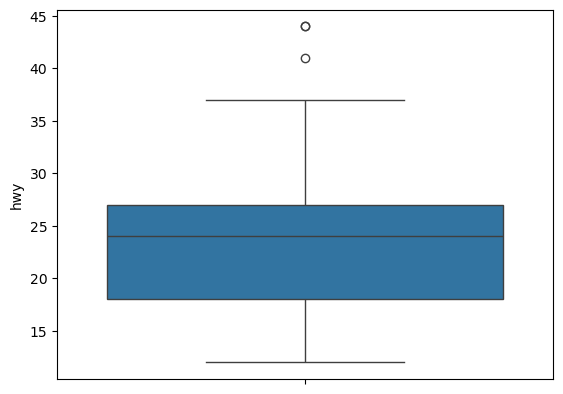

In [25]:
#이상치 제거하기 - 극단적인 값
#1. 상자 그림 살펴보기
mpg = pd.read_csv('mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [26]:
#2.극단치 기준값 구하기
#(1) 1사분위수, 3사분위수 구하기
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [27]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [28]:
#(2) IQR 구하기
iqr = pct75 - pct25
iqr

9.0

In [29]:
#(3) 하한, 상한 구하기
pct25 - 1.5 * iqr  # 하한

4.5

In [30]:
pct75 + 1.5 * iqr  # 상한

40.5

In [31]:
#3. 극단치를 결측 처리하기
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

3

In [32]:
#4. 결측치 제거하고 분석하기
# hwy 결측치 제거
# drv별 분리
# hwy 평균 구하기
mpg.dropna(subset = 'hwy') \
   .groupby('drv') \
   .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


In [33]:
#8-2 산점도
import pandas as pd
mpg = pd.read_csv('mpg.csv')

<Axes: xlabel='displ', ylabel='hwy'>

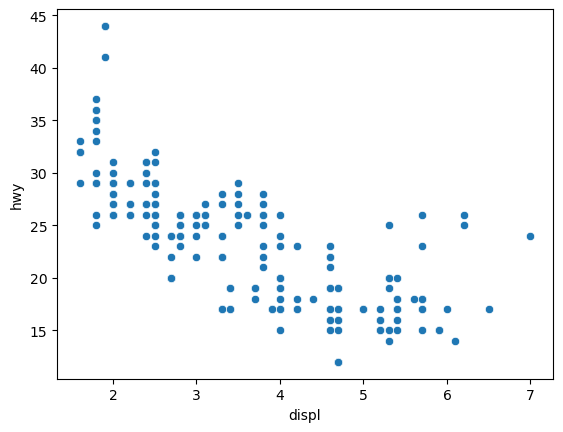

In [34]:
# x축은 displ, y축은 hwy를 나타낸 산점도 만들기
import seaborn as sns
sns.scatterplot(data = mpg, x='displ',y='hwy')

[(3.0, 6.0)]

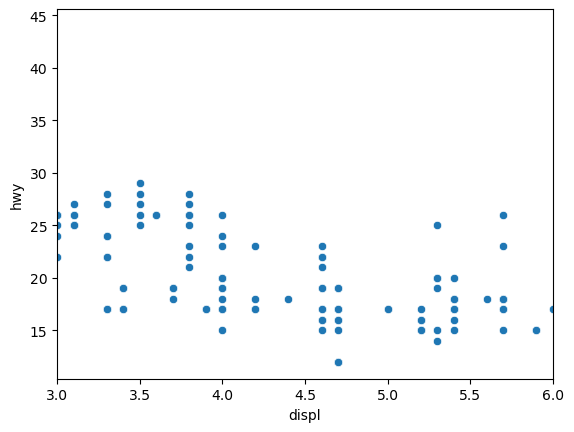

In [35]:
# x축 범위 3~6으로 제한
sns.scatterplot(data = mpg, x='displ',y='hwy') \
   .set(xlim = [3,6])

[(3.0, 6.0), (10.0, 30.0)]

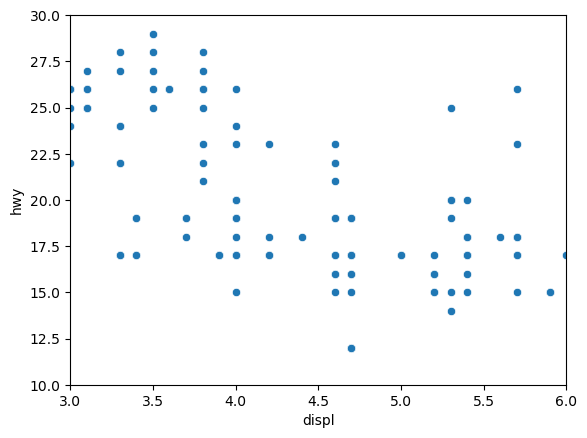

In [12]:
sns.scatterplot(data = mpg, x='displ',y='hwy') \
   .set(xlim = [3,6], ylim = [10,30])

<Axes: xlabel='displ', ylabel='hwy'>

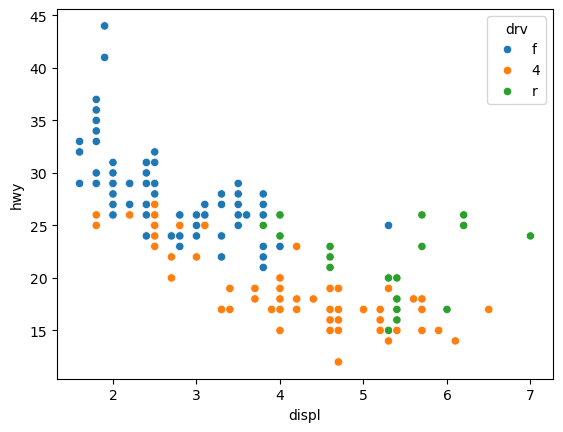

In [36]:
# drv별로 표식 색깔 다르게 표현
sns.scatterplot(data = mpg, x='displ',y='hwy', hue = 'drv') 

In [17]:
df_mpg = mpg.groupby('drv')\
            .agg(mean_hwy = ('hwy','mean'))
df_mpg

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [18]:
df_mpg = mpg.groupby('drv', as_index = False)\
            .agg(mean_hwy = ('hwy','mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


<Axes: xlabel='drv', ylabel='mean_hwy'>

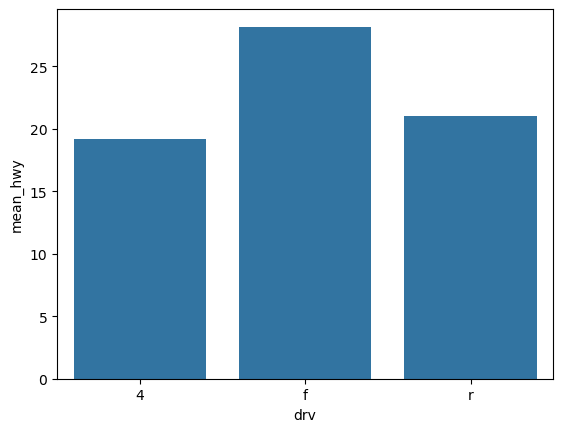

In [19]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

In [21]:
economics = pd.read_csv('economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<Axes: xlabel='date', ylabel='unemploy'>

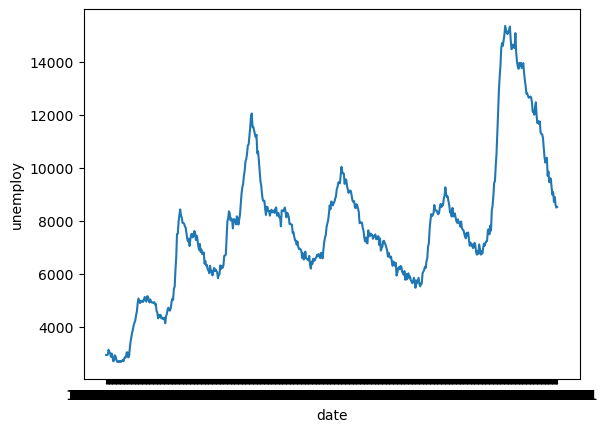

In [22]:
sns.lineplot(data = economics, x = 'date', y = 'unemploy')

In [23]:
economics['date2'] = pd.to_datetime(economics['date'])
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [24]:
economics[['date','date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [25]:
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int32

In [26]:
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int32

In [27]:
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int32

In [28]:
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<Axes: xlabel='year', ylabel='unemploy'>

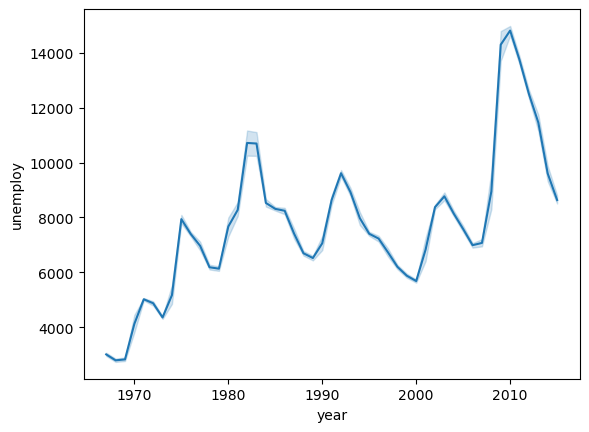

In [29]:
sns.lineplot(data = economics, x = 'year' , y = 'unemploy')

<Axes: xlabel='year', ylabel='unemploy'>

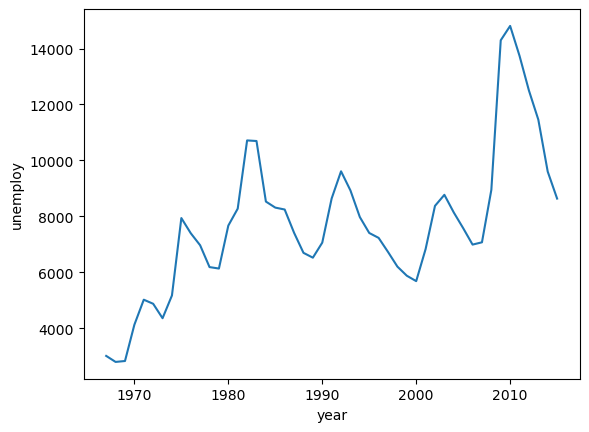

In [30]:
sns.lineplot(data = economics, x = 'year' , y = 'unemploy', errorbar = None) #신뢰구간 제거

<Axes: xlabel='drv', ylabel='hwy'>

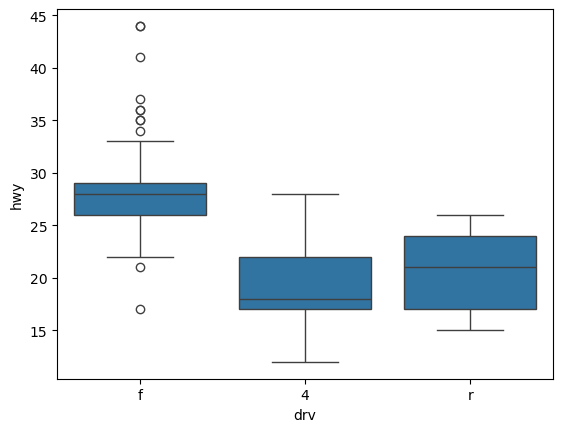

In [31]:
sns.boxplot(data=mpg, x='drv',y='hwy')